## Data Programming in Python | BAIS:6040
## Final Project -- NCAA Basketball Tournament
#### Group: TippieDawgs
#### Team Members: Kale Altman, Eric Dowe, Luke Kniffen, Malcom Newell, Nick Pittman

<hr>

Every year, the top 68 teams in college basketball compete in a postseason tournament, otherwise known as March Madness. Each team is given a ranking from 1 to 16 and is divided into one of four regions. The tournament is single-elimination, allowing for lower-ranked teams to potentially "upset" their opponents. This analysis will look to analyze which statistics are most important for a team to perform well, how lower-ranked teams are able to win multiple games, and try to predict each team's success using multiple machine learning models. 

The dataset will contain quantitative and qualitative data for every team from the last 10 postseson tournaments (680 rows). There are currently 24 attributes, but additional columns will be generated on an as-needed basis. 

### Import modules, read in data, and clean data

In [1]:
# Import needed modules/packages
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
# Get the path of your current work directory
os.getcwd()

'/home/njpittman/classdata/group01'

In [3]:
# Read in cbb dataset (2013-2023 data)
cbb = pd.read_csv("cbb.csv")
cbb.shape

(3523, 24)

In [4]:
cbb.info()
## null values only in POSTSEASON and SEED columns for non-tournament teams

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3523 entries, 0 to 3522
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        3523 non-null   object 
 1   CONF        3523 non-null   object 
 2   G           3523 non-null   int64  
 3   W           3523 non-null   int64  
 4   ADJOE       3523 non-null   float64
 5   ADJDE       3523 non-null   float64
 6   BARTHAG     3523 non-null   float64
 7   EFG_O       3523 non-null   float64
 8   EFG_D       3523 non-null   float64
 9   TOR         3523 non-null   float64
 10  TORD        3523 non-null   float64
 11  ORB         3523 non-null   float64
 12  DRB         3523 non-null   float64
 13  FTR         3523 non-null   float64
 14  FTRD        3523 non-null   float64
 15  2P_O        3523 non-null   float64
 16  2P_D        3523 non-null   float64
 17  3P_O        3523 non-null   float64
 18  3P_D        3523 non-null   float64
 19  ADJ_T       3523 non-null  

This data includes complete seasons, through the NCAA tournament for all teams. <br>
We want to only look at the teams that competed in the postseason

In [5]:
# Data with null values (Teams that did not make the tournament)
cbb[cbb.isnull().any(axis=1)]

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
56,Duquesne,A10,30,11,107.0,111.7,0.3790,51.2,51.7,18.3,...,33.8,49.5,47.7,36.2,38.5,67.6,-11.3,NaN,NaN,2015
57,Fordham,A10,30,9,101.0,103.0,0.4450,46.7,50.2,22.2,...,41.7,47.8,49.6,29.8,34.1,65.9,-12.3,NaN,NaN,2015
58,George Mason,A10,30,8,101.2,103.8,0.4276,45.5,50.0,21.9,...,44.7,44.9,48.4,31.6,35.3,65.0,-12.6,NaN,NaN,2015
59,George Washington,A10,35,22,107.2,96.2,0.7755,48.9,45.9,18.7,...,28.9,47.3,44.9,35.2,31.9,62.7,-2.3,NaN,NaN,2015
60,La Salle,A10,33,17,98.9,92.9,0.6734,46.7,45.8,19.9,...,34.4,46.1,45.1,32.1,31.6,64.8,-6.3,NaN,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3518,Toledo,MAC,34,27,119.9,109.6,0.7369,56.3,52.9,13.6,...,27.5,54.6,52.1,39.7,36.1,69.5,-1.2,NaN,NaN,2023
3519,Liberty,ASun,33,27,111.4,97.3,0.8246,55.5,49.3,16.0,...,27.8,56.4,48.6,36.4,33.6,64.4,-2.0,NaN,NaN,2023
3520,Utah Valley,WAC,34,28,107.1,94.6,0.8065,51.7,44.0,19.3,...,28.7,52.5,42.8,33.4,31.1,69.8,-0.3,NaN,NaN,2023
3521,UAB,CUSA,38,29,112.4,97.0,0.8453,50.3,47.3,17.3,...,28.9,48.8,47.2,35.6,31.6,70.7,-0.5,NaN,NaN,2023


Removing teams with null values in `POSTSEASON` variable will allow us to see <br> 
the full season statistics from teams that competed in the NCAA Tournament.

In [6]:
# Removed teams that did not make the tournament
cbb.dropna(how="any", inplace=True)
cbb.shape

(680, 24)

In [7]:
cbb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 680 entries, 0 to 3227
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        680 non-null    object 
 1   CONF        680 non-null    object 
 2   G           680 non-null    int64  
 3   W           680 non-null    int64  
 4   ADJOE       680 non-null    float64
 5   ADJDE       680 non-null    float64
 6   BARTHAG     680 non-null    float64
 7   EFG_O       680 non-null    float64
 8   EFG_D       680 non-null    float64
 9   TOR         680 non-null    float64
 10  TORD        680 non-null    float64
 11  ORB         680 non-null    float64
 12  DRB         680 non-null    float64
 13  FTR         680 non-null    float64
 14  FTRD        680 non-null    float64
 15  2P_O        680 non-null    float64
 16  2P_D        680 non-null    float64
 17  3P_O        680 non-null    float64
 18  3P_D        680 non-null    float64
 19  ADJ_T       680 non-null    float

In [8]:
# Change SEED from float to int datatype
cbb.SEED = cbb.SEED.apply(lambda x: int(x))
cbb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 680 entries, 0 to 3227
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        680 non-null    object 
 1   CONF        680 non-null    object 
 2   G           680 non-null    int64  
 3   W           680 non-null    int64  
 4   ADJOE       680 non-null    float64
 5   ADJDE       680 non-null    float64
 6   BARTHAG     680 non-null    float64
 7   EFG_O       680 non-null    float64
 8   EFG_D       680 non-null    float64
 9   TOR         680 non-null    float64
 10  TORD        680 non-null    float64
 11  ORB         680 non-null    float64
 12  DRB         680 non-null    float64
 13  FTR         680 non-null    float64
 14  FTRD        680 non-null    float64
 15  2P_O        680 non-null    float64
 16  2P_D        680 non-null    float64
 17  3P_O        680 non-null    float64
 18  3P_D        680 non-null    float64
 19  ADJ_T       680 non-null    float

In [9]:
cbb.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1,2017


Next, we added the variable `POSTSEASON_GAMES` to quantify how many games each team played in the tournament. <br> 
The `POSTSEASON` variable provides the same information, but it is an object datatype. <br>
Now, we can group by other parameters and calculate aggregate tournament success.

In [10]:
# Add postseason_games that turns postseason variable into numeric values
# Map tournament result to games played

def postseason_games(df):
    postseason_map = {'R68': 0,'R64': 1,'R32': 2,'S16': 3,'E8': 4,'F4': 5,'2ND': 6,'Champions': 6}
    df['POSTSEASON_GAMES'] = df['POSTSEASON'].map(postseason_map)
    return df

cbb = postseason_games(cbb)
cbb.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,POSTSEASON_GAMES
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1,2016,6
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1,2015,6
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3,2018,6
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3,2019,6
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1,2017,6


We added a variable to say if each team is in Power 6 conferences. <br>
This usually indicates having a tougher schedule and is more likely to produce cinderella teams

In [11]:
# Add a binary column for teams in Power 6 conferences
cbb["IS_POWER6"] = cbb.CONF.apply(lambda x: 1 if x in ['ACC','B12','B10','SEC','P12','BE'] else 0)
cbb.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,POSTSEASON_GAMES,IS_POWER6
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,44.6,32.7,36.2,71.7,8.6,2ND,1,2016,6,1
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,44.7,36.5,37.5,59.3,11.3,2ND,1,2015,6,1
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,46.8,35.2,33.2,65.9,6.9,2ND,3,2018,6,1
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,41.9,36.5,29.7,67.5,7.0,2ND,3,2019,6,1
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,40.0,38.2,29.0,71.5,7.7,2ND,1,2017,6,0


In [12]:
cbb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 680 entries, 0 to 3227
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TEAM              680 non-null    object 
 1   CONF              680 non-null    object 
 2   G                 680 non-null    int64  
 3   W                 680 non-null    int64  
 4   ADJOE             680 non-null    float64
 5   ADJDE             680 non-null    float64
 6   BARTHAG           680 non-null    float64
 7   EFG_O             680 non-null    float64
 8   EFG_D             680 non-null    float64
 9   TOR               680 non-null    float64
 10  TORD              680 non-null    float64
 11  ORB               680 non-null    float64
 12  DRB               680 non-null    float64
 13  FTR               680 non-null    float64
 14  FTRD              680 non-null    float64
 15  2P_O              680 non-null    float64
 16  2P_D              680 non-null    float64
 17  3

### Exploratory Analysis

Search any team and see their postseason results! <br>
(Any school ending in State is "St.") <br>
Ex. "Iowa St."

In [13]:
def team_search(df):
    team = input("Which team would you like to see?")
    team_info = df[df['TEAM'].str.lower() == team.lower()][["TEAM", "CONF", "POSTSEASON", "SEED", "YEAR"]].sort_values(by="YEAR")
    return team_info

team_search(cbb)

Which team would you like to see? iowa


,TEAM,CONF,POSTSEASON,SEED,YEAR
2391,Iowa,B10,R68,11,2014
2054,Iowa,B10,R32,7,2015
2057,Iowa,B10,R32,7,2016
2062,Iowa,B10,R32,10,2019
2459,Iowa,B10,R32,2,2021
2819,Iowa,B10,R64,5,2022
3189,Iowa,B10,R64,8,2023


### Analysis 1

Guiding Question 1: <br>
Are two-pointers, three-pointers, or free throws the most valuable for teams to perform well? 

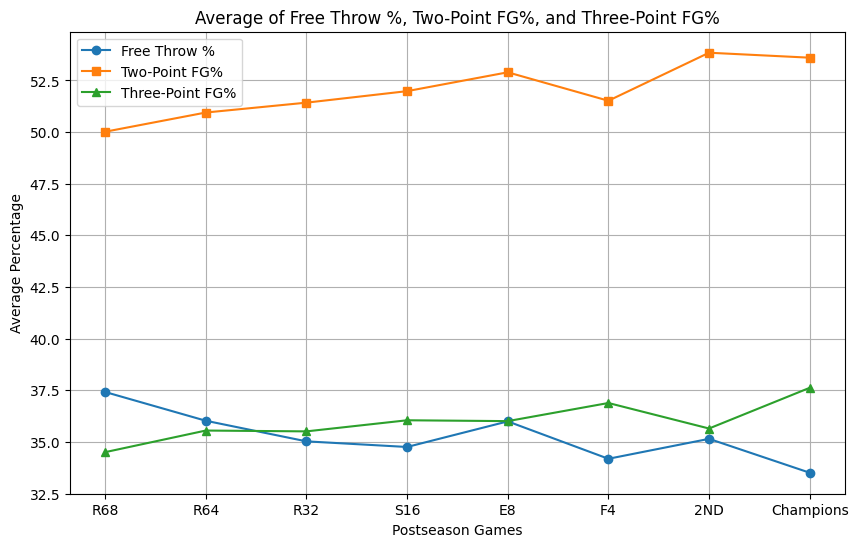

In [14]:
mean_ftr = cbb.groupby('POSTSEASON')['FTR'].mean()
mean_2po = cbb.groupby('POSTSEASON')['2P_O'].mean()
mean_3po = cbb.groupby('POSTSEASON')['3P_O'].mean()

plt.figure(figsize=(10, 6)) 

xaxis_order = ['R68', 'R64', 'R32', 'S16', 'E8', 'F4', '2ND', 'Champions']

# Reindex the 'POSTSEASON' categories so they are ordered by tournament success
mean_ftr = mean_ftr.reindex(xaxis_order)
mean_2po = mean_2po.reindex(xaxis_order)
mean_3po = mean_3po.reindex(xaxis_order)

plt.plot(mean_ftr.index, mean_ftr, marker='o', label='Free Throw %')
plt.plot(mean_2po.index, mean_2po, marker='s', label='Two-Point FG%')
plt.plot(mean_3po.index, mean_3po, marker='^', label='Three-Point FG%')

plt.xlabel('Postseason Games')
plt.ylabel('Average Percentage')
plt.title('Average of Free Throw %, Two-Point FG%, and Three-Point FG%')
plt.legend() 

plt.grid(True)
plt.show()

As the tournament progresses, three point % and two point % continue to increase in value, but  <br>
free throw percentage diminishes in value

This may be surprising because we often see free throws as a large contributor to winning or losing close games

### Analysis 2

Guiding question 2: <br>
On average, do strong offensive teams or strong defensive teams perform better in the tournament?

Offensive Efficiency = Points scored per 100 possessions (a higher OE is desirable)

Dffensive Efficiency = Points allowed per 100 possessions (a lower DE is desirable)

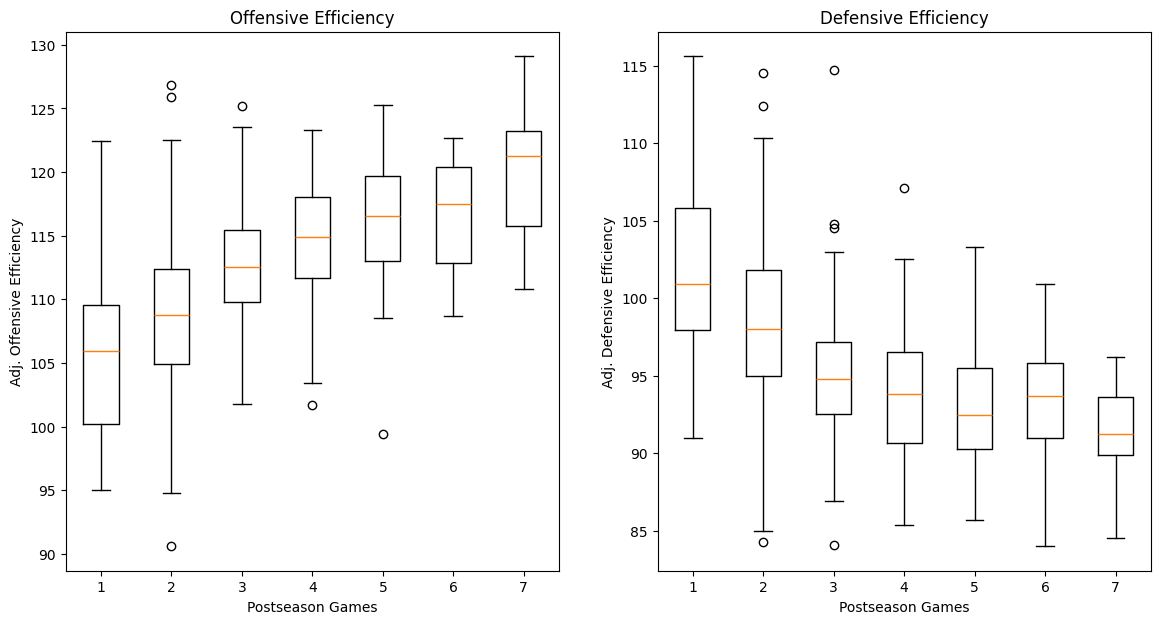

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

ax1 = axs[0]
ax2 = axs[1]


#offensive efficiency by round
round0o = cbb[cbb.POSTSEASON_GAMES == 0].ADJOE
round1o = cbb[cbb.POSTSEASON_GAMES == 1].ADJOE
round2o = cbb[cbb.POSTSEASON_GAMES == 2].ADJOE
round3o = cbb[cbb.POSTSEASON_GAMES == 3].ADJOE
round4o = cbb[cbb.POSTSEASON_GAMES == 4].ADJOE
round5o = cbb[cbb.POSTSEASON_GAMES == 5].ADJOE
round6o = cbb[cbb.POSTSEASON_GAMES == 6].ADJOE
offdata = [round0o, round1o, round2o, round3o, round4o, round5o, round6o]

# Scatter chart of offensive efficiency and longevity in tournaments
ax1.boxplot(offdata)

# Add x and y axis labels
ax1.set_xlabel('Postseason Games')
ax1.set_ylabel('Adj. Offensive Efficiency')
ax1.set_title('Offensive Efficiency')
#ax1.set_ylim(40,60)

#defensive efficiency by round
round0d = cbb[cbb.POSTSEASON_GAMES == 0].ADJDE
round1d = cbb[cbb.POSTSEASON_GAMES == 1].ADJDE
round2d = cbb[cbb.POSTSEASON_GAMES == 2].ADJDE
round3d = cbb[cbb.POSTSEASON_GAMES == 3].ADJDE
round4d = cbb[cbb.POSTSEASON_GAMES == 4].ADJDE
round5d = cbb[cbb.POSTSEASON_GAMES == 5].ADJDE
round6d = cbb[cbb.POSTSEASON_GAMES == 6].ADJDE
defdata = [round0d, round1d, round2d, round3d, round4d, round5d, round6d]

# Scatter chart of offensive efficiency and longevity in tournaments
ax2.boxplot(defdata)

# Add x and y axis labels
ax2.set_xlabel('Postseason Games')
ax2.set_ylabel('Adj. Defensive Efficiency')
ax2.set_title('Defensive Efficiency')
#ax2.set_ylim(40,60)

plt.show()

The boxplots above show the relationship between offensive efficiency and longevity in the tournament.

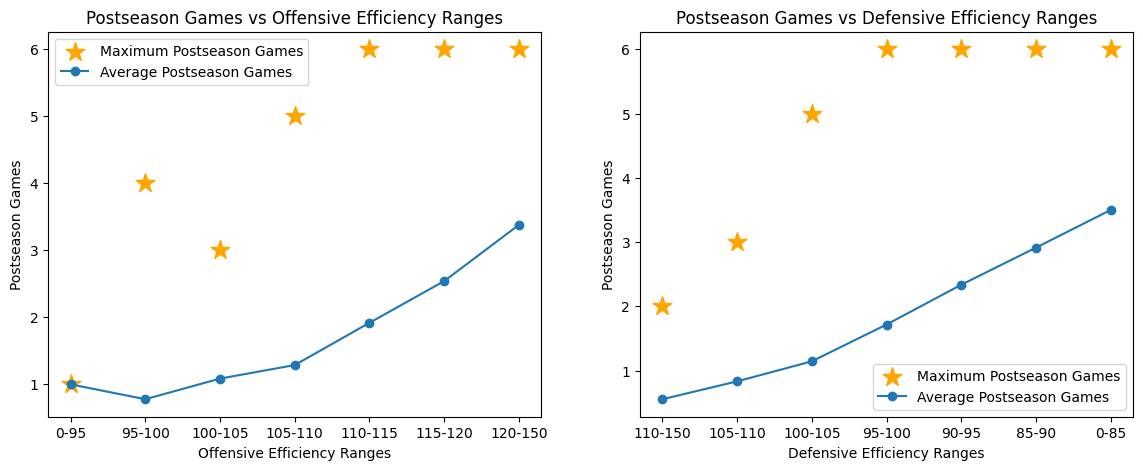

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

ax1 = axs[0]
ax2 = axs[1]

# Define ranges for offensive efficiency
offranges = [(0, 95),(95, 100),(100, 105),(105, 110),(110, 115),(115, 120),(120, 150)]
defranges = [(0, 85),(85, 90),(90, 95),(95, 100),(100, 105),(105, 110),(110, 150)]

# Create a list to store the data for each range
avg_off = [cbb[(cbb.ADJOE >= low) & (cbb.ADJOE < high)].POSTSEASON_GAMES.mean() for low, high in offranges]
max_off = [cbb[(cbb.ADJOE >= low) & (cbb.ADJOE < high)].POSTSEASON_GAMES.max() for low, high in offranges]
avg_def = [cbb[(cbb.ADJDE >= low) & (cbb.ADJDE < high)].POSTSEASON_GAMES.mean() for low, high in defranges]
max_def = [cbb[(cbb.ADJDE >= low) & (cbb.ADJDE < high)].POSTSEASON_GAMES.max() for low, high in defranges]

# Line graph of the maximum number of postseason games for each offensive efficiency range
ax1.scatter(range(len(offranges)), max_off, marker='*', s = 200, color='orange', label='Maximum Postseason Games')

# Line graph of the average number of postseason games for each offensive efficiency range
ax1.plot(range(len(offranges)), avg_off, marker='o', linestyle='-', label='Average Postseason Games')

# Add labels and title
ax1.set_xlabel('Offensive Efficiency Ranges')
ax1.set_ylabel('Postseason Games')
ax1.set_title('Postseason Games vs Offensive Efficiency Ranges')

# Set x-axis ticks and labels
ax1.set_xticks(range(len(offranges)), [f"{low}-{high}" for low, high in offranges])

# Add a legend
ax1.legend()

# Line graph of the maximum number of postseason games for each defensive efficiency range
ax2.scatter(range(len(defranges)), max_def, marker='*', s = 200, color='orange', label='Maximum Postseason Games')

# Line graph of the average number of postseason games for each offensive efficiency range
ax2.plot(range(len(defranges)), avg_def, marker='o', linestyle='-', label='Average Postseason Games')

# Add labels and title
ax2.set_xlabel('Defensive Efficiency Ranges')
ax2.set_ylabel('Postseason Games')
ax2.set_title('Postseason Games vs Defensive Efficiency Ranges')
ax2.invert_xaxis()

# Set x-axis ticks and labels
ax2.set_xticks(range(len(defranges)), [f"{low}-{high}" for low, high in defranges])

# Add a legend
ax2.legend()

plt.show()

The line charts above show the same relationship as the previous plot. However, the axes have been flipped. This shows that a team must have an OE greater than 110 and a DE less than 100 to reach the championship game.

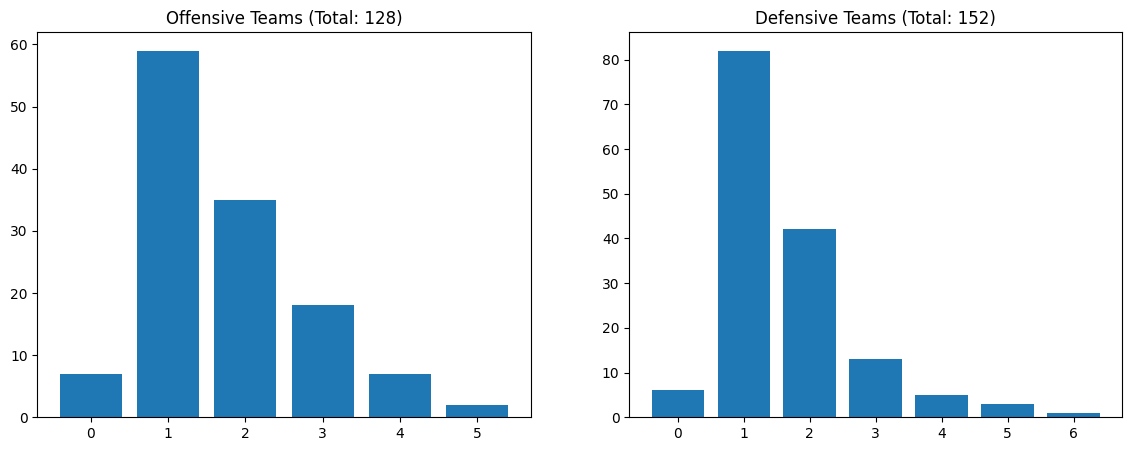

In [17]:
offmean = cbb['ADJOE'].mean()  # 111.22
defmean = cbb['ADJDE'].mean()  # 96.56

# Filter teams based on conditions
defteams = cbb[(cbb['ADJOE'] < offmean) & (cbb['ADJDE'] < defmean)]
offteams = cbb[(cbb['ADJOE'] > offmean) & (cbb['ADJDE'] > defmean)]

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

ax1 = axs[0]
ax2 = axs[1]

# Bar chart for teams with offensive efficiency greater than the mean and defensive efficiency greater than the mean
offcounts = offteams['POSTSEASON_GAMES'].value_counts()
ax1.bar(offcounts.index, offcounts)
ax1.set_title(f'Offensive Teams (Total: {offcounts.sum()})')
offcounts.reindex(['R68', 'R64', 'R32', 'S16', 'E8', 'F4'])

# Bar chart for teams with offensive efficiency less than the mean and defensive efficiency less than the mean
defcounts = defteams['POSTSEASON_GAMES'].value_counts()
ax2.bar(defcounts.index, defcounts)
ax2.set_title(f'Defensive Teams (Total: {defcounts.sum()})')

plt.show()

These bar charts compare teams that are strong in either offense or defense, but not both. It shows that more defensive teams make the tournament than offensive teams. However, they have a similar distribution once in the tournament, and neither type of team has one a championship.

### Analysis 3

Guiding question 3: <br>
Are there certain statistics that are common among Cinderella teams (low-ranked teams going far in the tournament)? <br>
Do they come from similar conferences? 

Next, we found the teams considered "Cinderella" teams. <br>
We defined them as 8+ seeds that went to the Sweet 16 or better. <br>
We calculated the mean values for each variable for Cinderella teams by each conference below

In [18]:
# Mean value for each parameter by conference for Cinderella teams

cinderella = (cbb.SEED >= 8) & (cbb.POSTSEASON_GAMES >= 3)
conf_cinderellas = cbb[cinderella].groupby('CONF').mean(numeric_only=True)
conf_cinderellas

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,YEAR,POSTSEASON_GAMES,IS_POWER6
CONF,,,,,,,,,,,,,,,,,,,,,
A10,35.500000,25.000000,112.500000,97.650000,0.835200,52.150000,49.050000,17.600000,20.050000,31.450000,...,49.850000,49.450000,37.700000,31.700000,65.700000,0.450000,12.000000,2013.500000,3.500000,0.0
ACC,35.142857,23.142857,112.285714,95.414286,0.864257,50.714286,48.142857,16.771429,18.428571,31.257143,...,50.071429,47.428571,34.528571,32.971429,67.700000,1.242857,9.571429,2018.857143,4.000000,1.0
ASun,35.000000,24.000000,103.400000,96.300000,0.695200,51.600000,46.900000,21.000000,22.100000,32.500000,...,52.300000,46.900000,33.400000,31.300000,69.100000,-4.000000,15.000000,2013.000000,3.000000,0.0
B10,35.500000,23.000000,114.200000,94.100000,0.899800,52.100000,48.600000,17.150000,17.100000,33.450000,...,51.900000,46.750000,34.900000,35.000000,65.400000,2.650000,9.500000,2019.500000,3.000000,1.0
B12,36.000000,23.500000,105.650000,91.050000,0.846500,50.850000,48.500000,18.800000,23.100000,27.150000,...,51.750000,49.850000,32.800000,30.950000,66.400000,2.650000,10.000000,2020.000000,3.500000,1.0
BE,38.000000,24.000000,115.600000,97.900000,0.871300,51.900000,51.600000,18.400000,17.500000,34.500000,...,52.000000,52.500000,34.500000,33.400000,68.400000,1.600000,11.000000,2017.000000,4.000000,1.0
CUSA,37.000000,35.000000,114.000000,95.800000,0.881500,54.300000,46.100000,16.900000,17.700000,31.400000,...,53.800000,44.700000,36.600000,32.400000,67.500000,4.700000,9.000000,2023.000000,5.000000,0.0
Ivy,30.000000,23.000000,109.100000,101.000000,0.708300,52.200000,48.400000,16.500000,14.700000,28.100000,...,53.300000,48.100000,33.700000,32.700000,67.000000,-3.200000,15.000000,2023.000000,3.000000,0.0
MAAC,33.000000,22.000000,99.400000,93.100000,0.678600,47.500000,44.200000,20.100000,20.500000,30.900000,...,45.600000,44.500000,34.600000,29.200000,65.600000,-5.600000,15.000000,2022.000000,4.000000,0.0


Observing correlations for each variable to the number of tournament games played (`POSTSEASON_GAMES`) <br>
All for Cinderlla teams only

In [19]:
# Correlations of each parameter with 'POSTSEASON_GAMES' for Cinderella teams. 

cbb[cinderella].corrwith(cbb.POSTSEASON_GAMES, numeric_only=True).sort_values()

SEED               -0.349946
TORD               -0.232562
DRB                -0.150390
FTRD               -0.084784
TOR                -0.034130
IS_POWER6          -0.006540
2P_D               -0.001052
2P_O                0.001197
ADJ_T               0.007469
3P_D                0.027178
ADJDE               0.027726
EFG_D               0.031652
YEAR                0.055267
EFG_O               0.095206
ORB                 0.157830
FTR                 0.188404
3P_O                0.191391
BARTHAG             0.194234
ADJOE               0.260083
G                   0.299915
WAB                 0.364148
W                   0.454472
POSTSEASON_GAMES    1.000000
dtype: float64

Number of Cinderella teams that have come from each conference

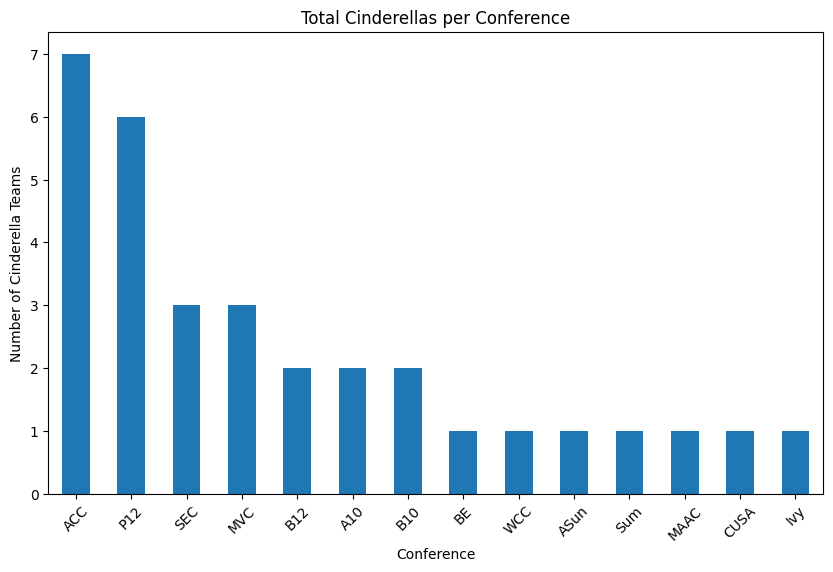

In [20]:
# Cinderellas per conference
counts = cbb[cinderella]['CONF'].value_counts()

# Plotting the number of teams per conference
plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.title('Total Cinderellas per Conference')
plt.xlabel('Conference')
plt.ylabel('Number of Cinderella Teams')
plt.xticks(rotation=45)
plt.show()

This suggests that the ACC and P12 may have undervalued teams if they are ranked 8th or lower and <br>
get to the Sweet 16 or better more often than other conferences

Next, we visualized the number of Cinderella teams from any conference that happen per year

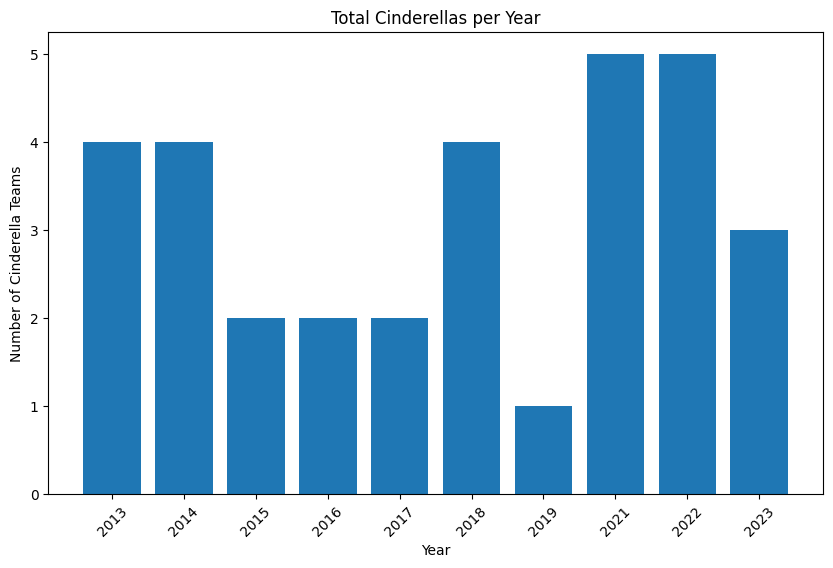

In [21]:
# Cinderellas per year
cbb['YEAR_STR'] = cbb.YEAR.apply(lambda x: str(x)) # change to str to skip 2020 in x axis
counts = cbb[cinderella]['YEAR_STR'].value_counts()

xaxis_order = ['2013','2014','2015','2016','2017','2018','2019','2021','2022','2023']

# Reindex the 'POSTSEASON' categories so they are ordered by tournament success
counts = counts.reindex(xaxis_order)
counts
# Plotting the number of teams per conference
plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts)
plt.title('Total Cinderellas per Year')
plt.xlabel('Year')
plt.ylabel('Number of Cinderella Teams')
plt.xticks(rotation=45)
plt.show()

Next, we looked at the number of tournament games played by seed (tournament success). <br>
We paired the seeds together by which seeds play each other in the first round <br>
and the matchups that we commonly see upsets in the first round

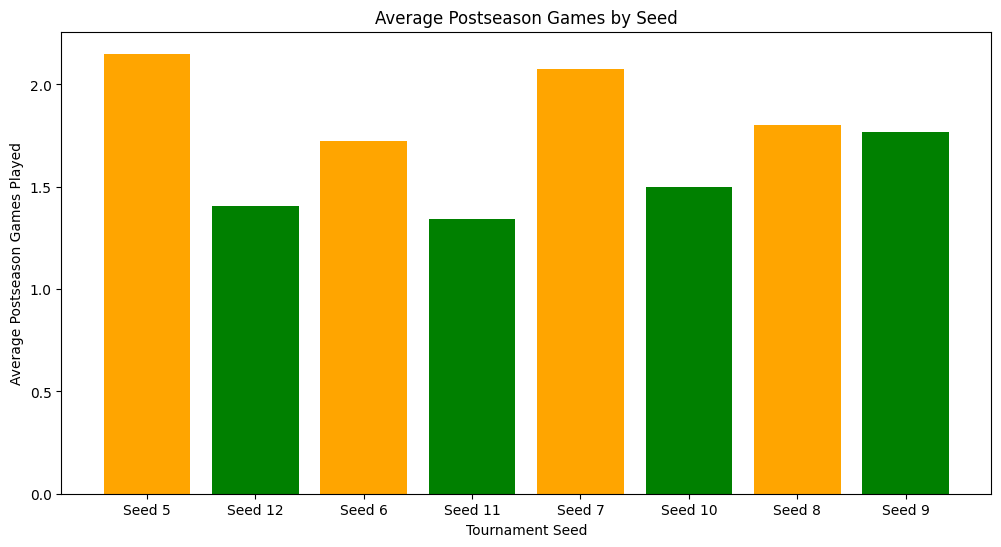

In [22]:
import matplotlib.pyplot as plt

# analyze performance based on seed pairs
# returns error if seed_pair is not valid
def cinderella_avg_games(data, seed_pairs):
    for tup in seed_pairs:
        if sum(tup) != 17:
            return 'Invalid seed pair.'
        
    seed_labels = []
    avg_games = []

    for seed1, seed2 in seed_pairs:
        # filter data to compare between seeds
        seed1_teams = data[data['SEED'] == seed1]
        seed2_teams = data[data['SEED'] == seed2]

        # avg amount of games
        seed1_stats = seed1_teams['POSTSEASON_GAMES'].mean()
        seed2_stats = seed2_teams['POSTSEASON_GAMES'].mean()

        seed_labels.append(f"Seed {seed1}")
        seed_labels.append(f"Seed {seed2}")

        avg_games.append(seed1_stats)
        avg_games.append(seed2_stats)

    # bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(seed_labels, avg_games, color=['orange', 'green', 'orange', 'green', 'orange', 'green'])
    plt.title('Average Postseason Games by Seed')
    plt.xlabel('Tournament Seed')
    plt.ylabel('Average Postseason Games Played')
    plt.show()

seed_pairs = [(5, 12), (6, 11), (7, 10), (8, 9)]

cinderella_avg_games(cbb, seed_pairs)


Below, we plotted higher correlated parameters by conference. <br>
We also filtered for conferences that produced 2 or more Cinderella teams

ADJOE = Offensive Efficiency (Points scored per 100 possessions, a higher OE is desirable) <br>
TORD = Turnover Percentage Committed (lower TORD is more desirable) <br>
3P_O = Three-Point Shooting Percentage <br>
WAB = Wins Above Bubble (higher WAB is more desirable)

/tmp/ipykernel_695/2782978259.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mult_cinderellas = conf_cinderellas[cbb[cinderella]['CONF'].value_counts() >= 2]


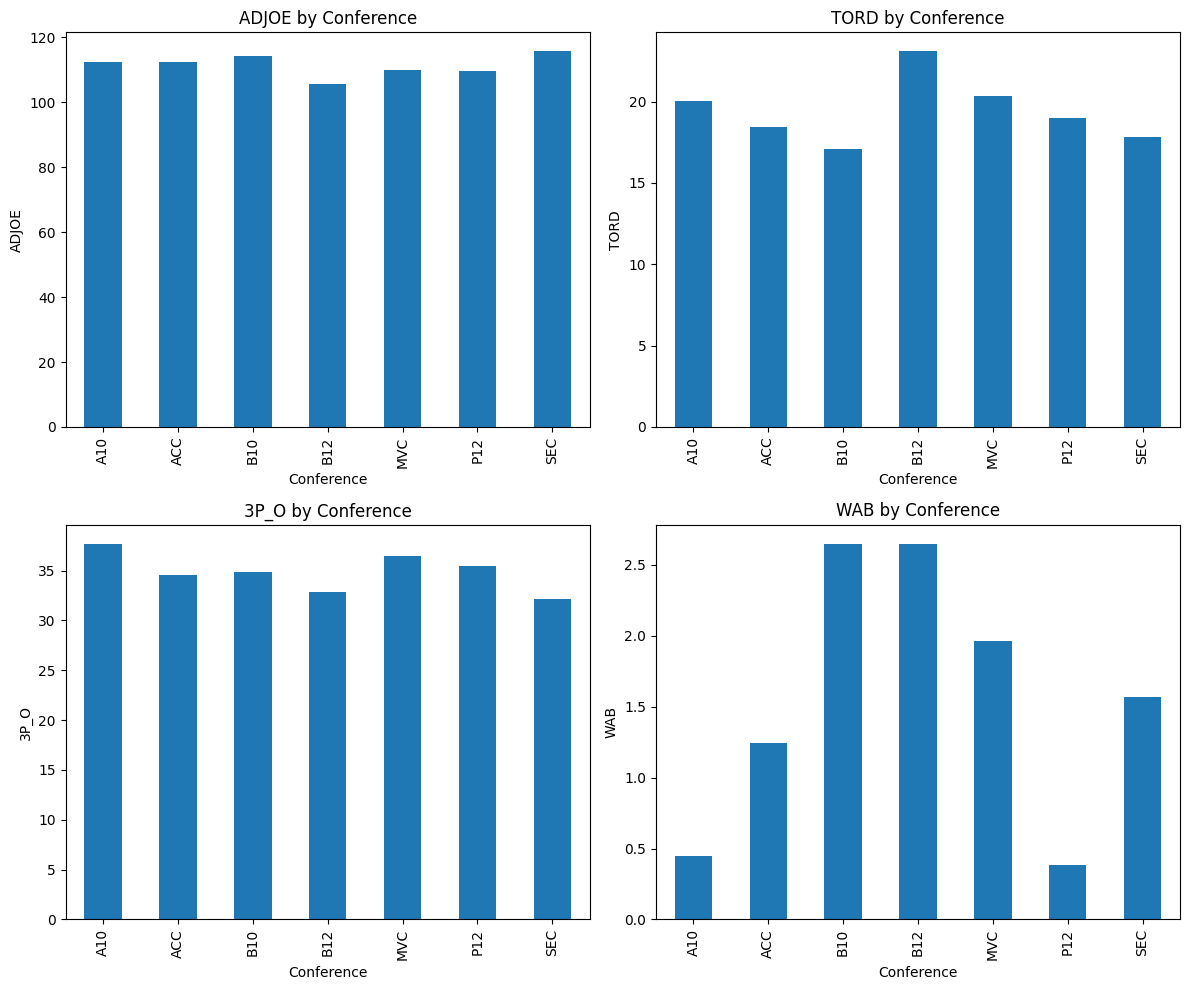

In [23]:
# Plots of higher corrleated parameters by conference.

mult_cinderellas = conf_cinderellas[cbb[cinderella]['CONF'].value_counts() >= 2]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plotting ADJOE by Conference
mult_cinderellas['ADJOE'].plot(kind='bar', ax=axes[0, 0], legend=False)
axes[0, 0].set_title('ADJOE by Conference')
axes[0, 0].set_ylabel('ADJOE')
axes[0, 0].set_xlabel('Conference')

# Plotting TORD by Conference
mult_cinderellas['TORD'].plot(kind='bar', ax=axes[0, 1], legend=False)
axes[0, 1].set_title('TORD by Conference')
axes[0, 1].set_ylabel('TORD')
axes[0, 1].set_xlabel('Conference')

# Plotting 3P_O by Conference
mult_cinderellas['3P_O'].plot(kind='bar', ax=axes[1, 0], legend=False)
axes[1, 0].set_title('3P_O by Conference')
axes[1, 0].set_ylabel('3P_O')
axes[1, 0].set_xlabel('Conference')

# Plotting WAB by Conference
mult_cinderellas['WAB'].plot(kind='bar', ax=axes[1, 1], legend=False)
axes[1, 1].set_title('WAB by Conference')
axes[1, 1].set_ylabel('WAB')
axes[1, 1].set_xlabel('Conference')

#Looked this up and tight_layout() makes sure the labels don't overlap
plt.tight_layout()
plt.show()

### Analysis 4

How is WAB and BARTHAG distributed among tournament teams? <br>
Are either metrics valuable in predicting tournament success? <br>

BARTHAG = Power Rating (Probability of beating an average Division I team) <br>
WAB = The number of wins a team has over a bubble team, if playing the same schedule

In [24]:
# Correlations
a = cbb[['WAB', 'BARTHAG', 'ADJ_T', 'POSTSEASON_GAMES']]
a.corr()

,WAB,BARTHAG,ADJ_T,POSTSEASON_GAMES
WAB,1.000000,0.896301,-0.028414,0.560783
BARTHAG,0.896301,1.000000,-0.060323,0.502648
ADJ_T,-0.028414,-0.060323,1.000000,-0.050899
POSTSEASON_GAMES,0.560783,0.502648,-0.050899,1.000000


In [25]:
# Binary positive and negative WAB variable (POS_WAB)
cbb['POS_WAB'] = cbb.WAB.apply(lambda x: 1 if x>0 else 0)

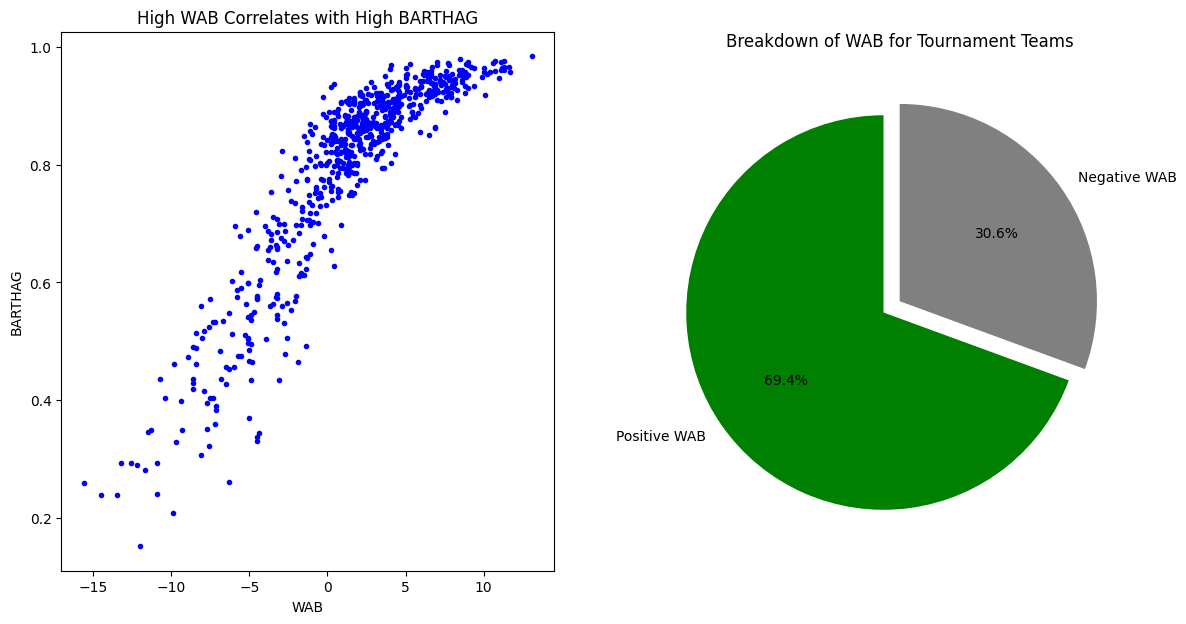

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

ax1 = axs[0]
ax2 = axs[1]

# Scatter chart of BARTHAG and WAB
ax1.scatter(cbb['WAB'], cbb['BARTHAG'], color="blue", marker=".")

# Add x and y axis labels
ax1.set_xlabel('WAB')
ax1.set_ylabel('BARTHAG')
ax1.set_title('High WAB Correlates with High BARTHAG')

# Pie chart of WAB
WAB_counts = cbb.POS_WAB.value_counts().sort_index()
explodes = [0,0.1]

ax2.pie(WAB_counts, labels=["Negative WAB", "Positive WAB"], explode=explodes, autopct='%.1f%%', colors=['gray','green'], startangle=90, counterclock=False)
ax2.set_title("Breakdown of WAB for Tournament Teams")

plt.show()

The graph of the left shows that WAB is positively correlated to  BARTHAG. <br>
(High power ratings and number of wins a team has over bubble teams) <br>

Also, the pie chart shows that 70% of tournament teams have a positive WAB

Next, we looked at the mean WAB by conference

In [27]:
cbb.groupby("CONF").WAB.mean().sort_values()

CONF
NEC    -9.110000
SWAC   -7.520000
MEAC   -7.440000
MAAC   -5.160000
BSth   -4.718182
Pat    -4.510000
Horz   -3.970000
BW     -3.860000
ASun   -3.722222
SB     -3.654545
BSky   -3.330000
AE     -3.220000
OVC    -3.218182
Sum    -2.790000
CAA    -2.730000
Slnd   -2.690000
MAC    -1.820000
WAC    -1.720000
Ivy    -1.611111
SC     -1.090000
CUSA   -1.000000
A10     1.570000
MVC     1.707143
MWC     2.080769
P12     3.206818
Amer    3.472000
SEC     3.807407
BE      3.861818
B10     4.072222
WCC     4.321053
B12     4.560000
ACC     4.616923
Name: WAB, dtype: float64

The next graph shows the distribution of WAB for the conferences with the 4 highest WAB means

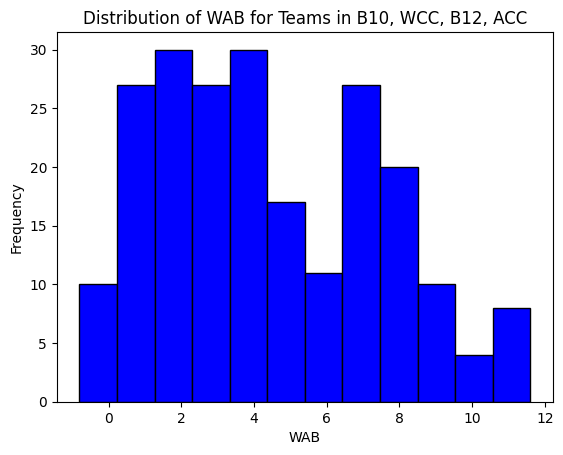

In [28]:
Top_WAB = cbb[(cbb.CONF == 'B12') | (cbb.CONF == 'ACC') | (cbb.CONF == 'WCC') | (cbb.CONF == 'B10')].WAB
plt.hist(Top_WAB, bins=12, color='blue', edgecolor='black')
plt.xlabel("WAB")
plt.ylabel("Frequency")
plt.title("Distribution of WAB for Teams in B10, WCC, B12, ACC")
plt.show()

### Machine Learning

Using several regressor methods, we wanted to construct a model that can most accurately predict a team's depth in the tournament. <br>
(`POSTSEASON_GAMES`, the number of games played in the NCAA tournament)

We removed wins and games because of the added bias from reflecting postseason performance

In [29]:
# Removed wins and games
cbb1 = cbb.drop(columns=['G', 'W'])
cbb1.head()

,TEAM,CONF,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,POSTSEASON_GAMES,IS_POWER6,YEAR_STR,POS_WAB
0,North Carolina,ACC,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,...,36.2,71.7,8.6,2ND,1,2016,6,1,2016,1
1,Wisconsin,B10,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,...,37.5,59.3,11.3,2ND,1,2015,6,1,2015,1
2,Michigan,B10,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,...,33.2,65.9,6.9,2ND,3,2018,6,1,2018,1
3,Texas Tech,B12,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,...,29.7,67.5,7.0,2ND,3,2019,6,1,2019,1
4,Gonzaga,WCC,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,...,29.0,71.5,7.7,2ND,1,2017,6,0,2017,1


In [30]:
# Function for finding moderately correlated values
# returns variables that are correlated, removing the predictor column
# resulting dataframe can be used for machine learning analysis
def good_corr(df, pred_col, corr):
    df = df.corrwith(df[pred_col], numeric_only=True).round(4)
    df = df.sort_values().to_frame()
    df = df.drop(f"{pred_col}")
    df.columns = ['CORRELATION']
    return df[abs(df.CORRELATION)>corr]

In [31]:
# Variables with good correlation to postseason_games
target = 'POSTSEASON_GAMES'
x_vars = good_corr(cbb1, target, 0.2)
x_vars

,CORRELATION
SEED,-0.5761
ADJDE,-0.4497
EFG_D,-0.2511
2P_D,-0.2252
2P_O,0.2254
EFG_O,0.2377
IS_POWER6,0.3587
POS_WAB,0.3845
BARTHAG,0.5026
ADJOE,0.5235


In [32]:
features = x_vars.index

X = cbb[features]
y = cbb[target]
X.shape

(680, 11)

In [33]:
# Function for splitting the data into training and testing components
# allows user to specify X df, y df, splitting parameter, and random_state
from sklearn.model_selection import train_test_split
def train_test(x, y, test_size, random_state):
    return train_test_split(x, y, test_size=test_size, random_state=random_state)

In [34]:
X_train, X_test, y_train, y_test = train_test(X, y, 0.20, 68)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((544, 11), (544,), (136, 11), (136,))

#### k-Nearest Neighbors (kNN)

In [35]:
from sklearn.neighbors import KNeighborsRegressor
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

k_vals = [3,5,7,9,11,13,15,20,30,40,50,60,70,80,90,100] # k neighbors to test

r_vals = [] # empty array of r^2 values (normal kNN)
max_r = 0 # placeholder for max r^2 value (normal kNN)
max_k = 0 # placeholder for best k value (normal kNN)

wr_vals = [] # empty array of r^2 values (weighted kNN)
max_wr = 0 # placeholder for max r^2 value (weighted kNN)
max_wk = 0 # placeholder for best k value (weighted kNN)

# loop through each k value, apply to each ML model, and record the results
for k in k_vals:
    knr = KNeighborsRegressor(n_neighbors=k, p=2)
    knr.fit(X_train, y_train)
    current_r = knr.score(X_test, y_test)
    if current_r > max_r:
        max_r = current_r
        max_k = k
    r_vals.append(current_r*100) #convert to percentage
    
    w_knr = KNeighborsRegressor(n_neighbors=k, weights='distance', p=2) # weight points by inverse distance
    w_knr.fit(X_train, y_train)
    w_current_r = w_knr.score(X_test, y_test)
    if w_current_r > max_wr:
        max_wr = w_current_r
        max_wk = k
    wr_vals.append(w_current_r*100)

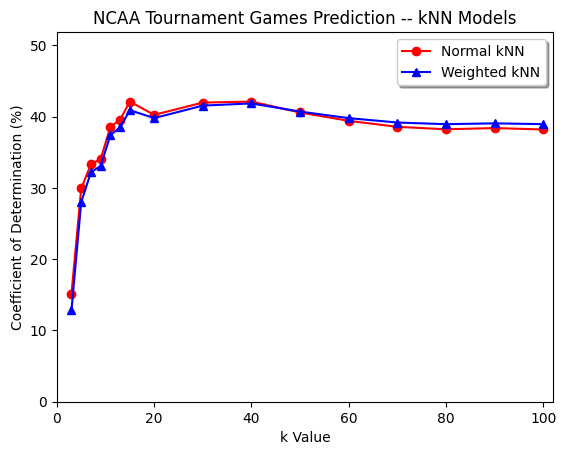

Best k value:  15
Best r^2 value: 42.11%
Best k value (weighted):  40
Best r^2 value: 41.85%


In [36]:
# Graph of KNN Model
plt.plot(k_vals,r_vals,'ro-', label='Normal kNN')
plt.plot(k_vals,wr_vals, 'b^-', label='Weighted kNN')
plt.legend(loc='best', shadow=True)

plt.axis([0,102,0,max_wr*100+10])
plt.xlabel('k Value')
plt.ylabel('Coefficient of Determination (%)')
plt.title('NCAA Tournament Games Prediction -- kNN Models')
plt.show()

#Conclusion
print("Best k value: ", max_k)
print("Best r^2 value: {}%".format(round(max_r*100,2)))
print("Best k value (weighted): ", max_wk)
print("Best r^2 value: {}%".format(round(max_wr*100,2)))

#### Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression


In [38]:
lr.fit(X_train, y_train)

LinearRegression()

In [39]:
train = lr.score(X_train, y_train)
test = lr.score(X_test, y_test)

print('Training score: {}%'.format(round(train*100,2)))
print('Test score: {}%'.format(round(test*100,2)))

Training score: 46.2%
Test score: 46.06%


In [40]:
from sklearn.metrics import mean_squared_error, r2_score

preds = lr.predict(X_test)
mse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)

print('Mean Squared Error:', round(mse,2))
print('R^2 Score: {}%'.format(round(r2*100,2)))

Mean Squared Error: 0.88
R^2 Score: 46.06%


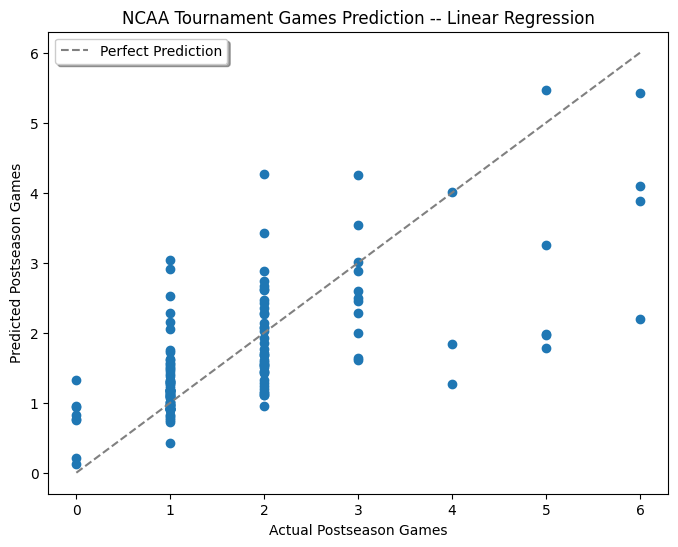

In [41]:
plt.figure(figsize=(8, 6))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='gray', label='Perfect Prediction')
plt.scatter(y_test, preds)
plt.title('NCAA Tournament Games Prediction -- Linear Regression')
plt.xlabel('Actual Postseason Games')
plt.ylabel('Predicted Postseason Games')
plt.legend(loc='best', shadow=True)
plt.show()

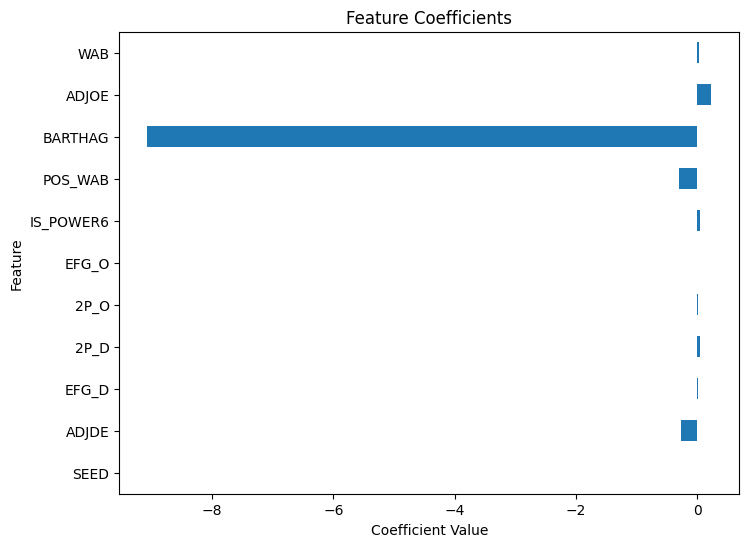

In [42]:
# Plot coefficients to analyze weight of different features for this model

feature_coefficients = pd.Series(lr.coef_, index=X.columns)

plt.figure(figsize=(8, 6))
feature_coefficients.plot(kind='barh')
plt.title('Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

#### Decision Tree

In [43]:
from sklearn.tree import DecisionTreeRegressor
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

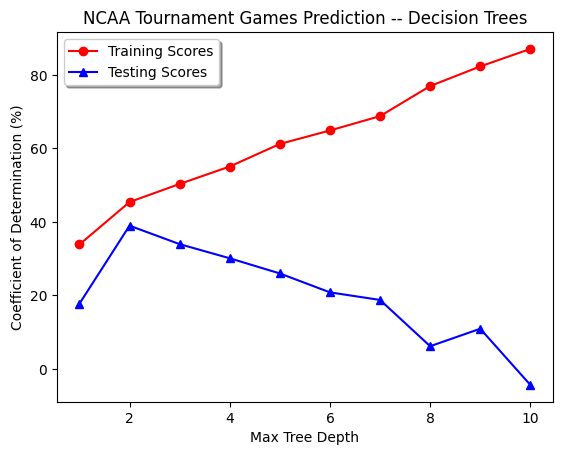

Best depth value 2
Best r^2 value: 38.99%


In [44]:
max_depth = [1,2,3,4,5,6,7,8,9,10]
trains = []
tests = []
max_dt_r = 0
max_dt_d = 0

for d in max_depth:
    tree = DecisionTreeRegressor(max_depth=d)
    tree.fit(X_train, y_train)
    current_train = tree.score(X_train, y_train)
    current_test = tree.score(X_test, y_test)
    if current_test > max_dt_r:
        max_dt_r = current_test
        max_dt_d = d
        best_dt = tree
    trains.append(current_train*100)
    tests.append(current_test*100)
        
# plot graph
plt.plot(max_depth, trains, "ro-", label="Training Scores")
plt.plot(max_depth, tests, "b^-", label="Testing Scores")
plt.xlabel("Max Tree Depth")
plt.ylabel('Coefficient of Determination (%)')
plt.title('NCAA Tournament Games Prediction -- Decision Trees')
plt.legend(loc='best', shadow=True)
plt.show()

# Conclusions
print("Best depth value", max_dt_d)
print("Best r^2 value: {}%".format(round(max_dt_r*100,2)))

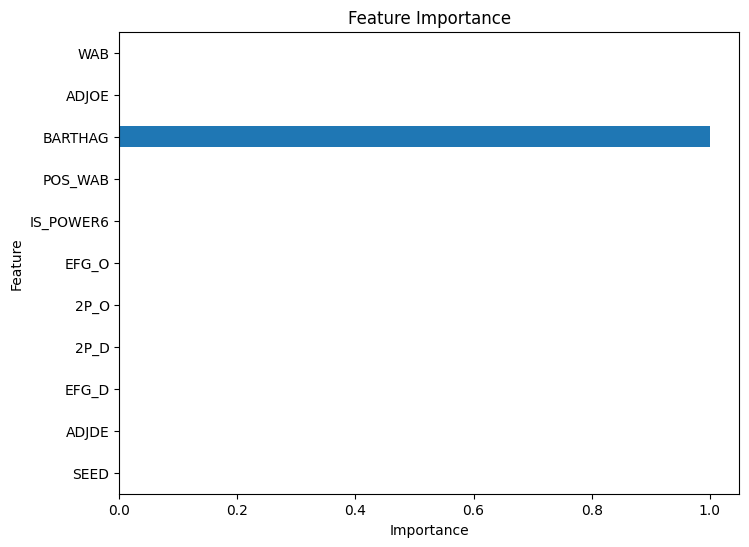

In [45]:
# Plotting feature importance
## should we remove this plot??
feature_importance = pd.Series(best_dt.feature_importances_, index=X.columns)

plt.figure(figsize=(8, 6))
feature_importance.plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### Random Forest

In [46]:
from sklearn.ensemble import RandomForestRegressor
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor

In [47]:
max_features = [1,2,3,4,5,6,7] # array for different numbers of features to test
rf_r_train = [] # empty array of r^2 training values (RF)
rf_r_test = [] # empty array of r^2 test values (RF)
max_rf_r = 0 # placeholder for max r^2 value (RF)
max_rf_m = 0 # placeholder for best m value (RF)

for m in max_features:
    rfr = RandomForestRegressor(n_estimators=1000, max_features=m)
    rfr.fit(X_train, y_train)
    rf_current_train = rfr.score(X_train, y_train)
    rf_current_test = rfr.score(X_test, y_test)
    if rf_current_test > max_rf_r:
        max_rf_r = rf_current_test
        max_rf_m = m
        best_forest = rfr
    rf_r_train.append(rf_current_train*100)
    rf_r_test.append(rf_current_test*100)

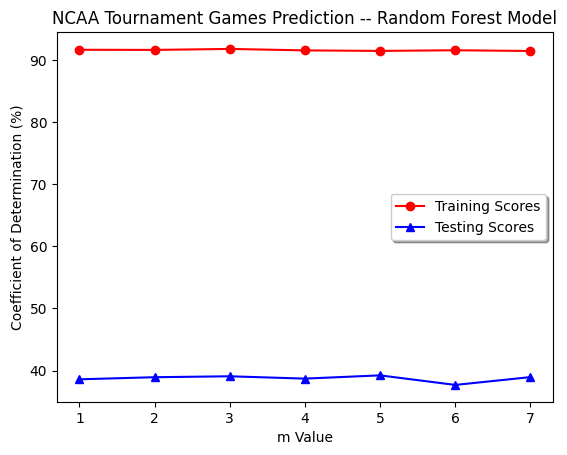

Best m value:  5
Best r^2 value: 39.22%


In [48]:
# plot graph
plt.plot(max_features, rf_r_train, 'ro-', label="Training Scores")
plt.plot(max_features, rf_r_test, 'b^-', label="Testing Scores")
# plt.axis([0,8,min(rf_r_vals)-10, max_rf_r*100+10])
plt.xlabel('m Value')
plt.ylabel('Coefficient of Determination (%)')
plt.title('NCAA Tournament Games Prediction -- Random Forest Model')
plt.legend(loc='best', shadow=True)
plt.show()

#Conclusion
print("Best m value: ", max_rf_m)
print("Best r^2 value: {}%".format(round(max_rf_r*100,2)))

#### Machine Learning Summary
<u>Max R-Squared</u>  
1. Linear Regression: 46.06% 
2. kNN: 42.11% 
3. Weighted kNN: 41.85%    
4. Random Forest: 39.22%  
5. Decision Tree: 38.99%

While this performance is relatively low, several other factors such as pressure, fatigue, and injuries likely played a factor in determining a team’s success in the tournament. Many of these factors are qualitative and were not included in our dataset.

### Analysis 5

Main question: <br>
What statistics are most important for teams to perform well in the tournament? 

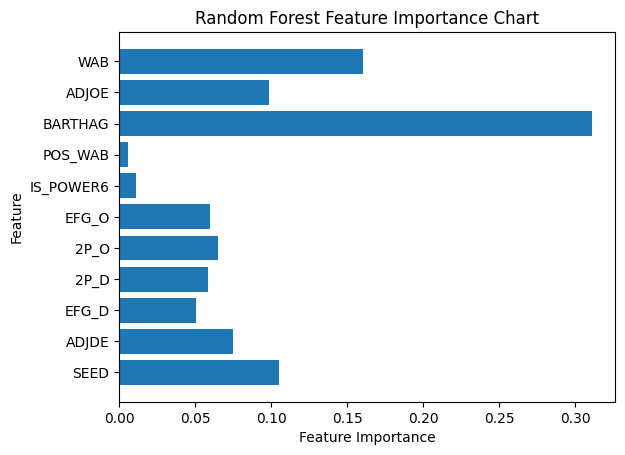

In [49]:
# Feature Importances Chart - Random Forest
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
index = range(len(features)) #references features selected from high_corr function

plt.barh(index, best_forest.feature_importances_) #horizontal bar chart
plt.ylabel('Feature')
plt.yticks(index,features)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance Chart")
plt.show()

This performance also correlated with our feature importance plot, where season-long metrics such as BARTHAG and WAB provided the best indication of a team’s performance. Not surprisingly, the team’s seed also appeared relatively important, as teams granted a higher seed will play “easier” opponents. Adjusted offense efficiency outperformed adjusted defense efficiency, which, while both important, indicates that offensively dominant teams will tend to outperform defensively dominant teams, on average. Interestingly, IS_POWER6 was one of the worst features at predicting performance. While stronger schedules can help improve a team’s resume and improve their chances of making the tournament, it becomes virtually worthless in the post-season. Simply put, in an era where Cinderella teams regularly bust brackets, there exist factors that cannot be measured, and results that cannot be predicted, to culminate in the beauty that is ‘March Madness.’

<u><b>Challenges</b></u>
- Handling teams that play in the "First Four"
- Eliminating bias within the dataset that indicates the team's success (G and W)
- Generating sufficient functions to be implemented in the project
- Incorporating interactive features such as drop-down windows or widgets
- Creating more categorical variables for aggregating data
- Only 10 years worth of tournament data